# Task 1 :

Logistic Regression is a good approach for predominantly classification problems (categorical or binary). In essence, it's useful where probability as an outcome is expected, and there's a linear relationship between the dependent (log probability) and independent variables. Some standard examples can include spam detection, churn prediction, fraud detection, disease disorder predictions etc. Basically where we have a discrete label as objective. Image classification, sentiment analysis, OCR labeling, are also examples where logistic regression can be used. For instance, in image classification, the label maybe specific category like cat/dog etc. Or in OCR, labels are specific alphabets or digits. We are estimating the likelihood or the probability of the the given input falling under a class category. (Soft-max generates probability)

---

# Task 2 :

The data-set I am opting for is Student Performance from UCI ML (or OpenML) repository. Task here is to predict student performance in secondary education (high school). It's Multivariate, with 649 instances and 30 features.

**Additional Information**

Given data-set comprises of various attributes collected from schools of Portugal with the objective of understanding the lack of success in the core classes of Mathematics. In broad, the attributes constitute student grades, demographic, social and school related features. The data-set was published as aprt of [Cortez and Silva, 2008](https://www.semanticscholar.org/paper/61d468d5254730bbecf822c6b60d7d6595d9889c).

**URL :** https://archive.ics.uci.edu/dataset/320/student+performance or https://www.openml.org/search?type=data&status=active&id=42351

In [10]:
#%pip install scikit-learn seaborn matplotlib pandas numpy

In [352]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.dpi':(100)})
sns.set_style("darkgrid")

Fetching data from OpenML database (now comes packaged with scikit-learn)

In [485]:
student_performance = fetch_openml(data_id=42351, as_frame=True)
df = student_performance.data
print(f"Data has {df.shape[0]} rows and {df.shape[1]} columns.")
print("Column Headers include :", df.columns.tolist())

Data has 649 rows and 32 columns.
Column Headers include : ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']


Data-set description says there are no missing values, but we'll anyways confirm it.

In [47]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
dtype: int64

In [48]:
print(f"Number of rows with missing data \t:{df.isnull().sum(axis=1).sum()}")

Number of rows with missing data 	:0


There are no missing values. However, in the offchance it does show up, following can be uncommented to remove them. (In my opinion, if all the features are indeed required to perform the task, and number of missing values are low, best to remove them)

In [26]:
#df.dropna(inplace=True)
#print(f"Number of rows with missing data after dropping NaNs \t:{df.isnull().sum(axis=1).sum()}")

---
We'll explore a bit more on the binary/categorical nature of our dataset.

In [49]:
pd.set_option('display.max_colwidth', None)
descriptions = {
    'Variable': df.columns,
    'Type': ['Binary' if df[feat].nunique() == 2 else 'Categorical' for feat in df.columns],
    'Range': [f"{df[feat].min()} - {df[feat].max()}" if pd.api.types.is_numeric_dtype(df[feat]) else str(df[feat].unique()) for feat in df.columns]
}
pd.DataFrame(descriptions)

,Variable,Type,Range
0,school,Binary,"[""'GP'"" ""'MS'""]"
1,sex,Binary,"[""'F'"" ""'M'""]"
2,age,Categorical,15 - 22
3,address,Binary,"[""'U'"" ""'R'""]"
4,famsize,Binary,"[""'GT3'"" ""'LE3'""]"
5,Pstatus,Binary,"[""'A'"" ""'T'""]"
6,Medu,Categorical,0 - 4
7,Fedu,Categorical,0 - 4
8,Mjob,Categorical,"[""'at_home'"" ""'health'"" ""'other'"" ""'services'"" ""'teacher'""]"
9,Fjob,Categorical,"[""'teacher'"" ""'other'"" ""'services'"" ""'health'"" ""'at_home'""]"


13 attributes have binary labels, while 19 attributes are categorical in nature. **The labels in this data-set are G1 and G2, each corresponding to each period of the academic year. They are strongly correlated which we will show later.**

## Basic Exploration

First some small explorations are considered in the given data-set. For instance, 

**How does age relate with absences?**

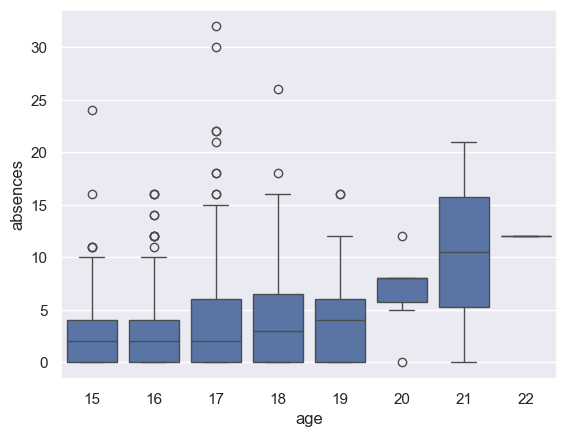

In [72]:
plot = sns.boxplot(data=df, x='age', y='absences')

Feeble trend but older students slightly tending to more absences.

**How does age relate with grades?**

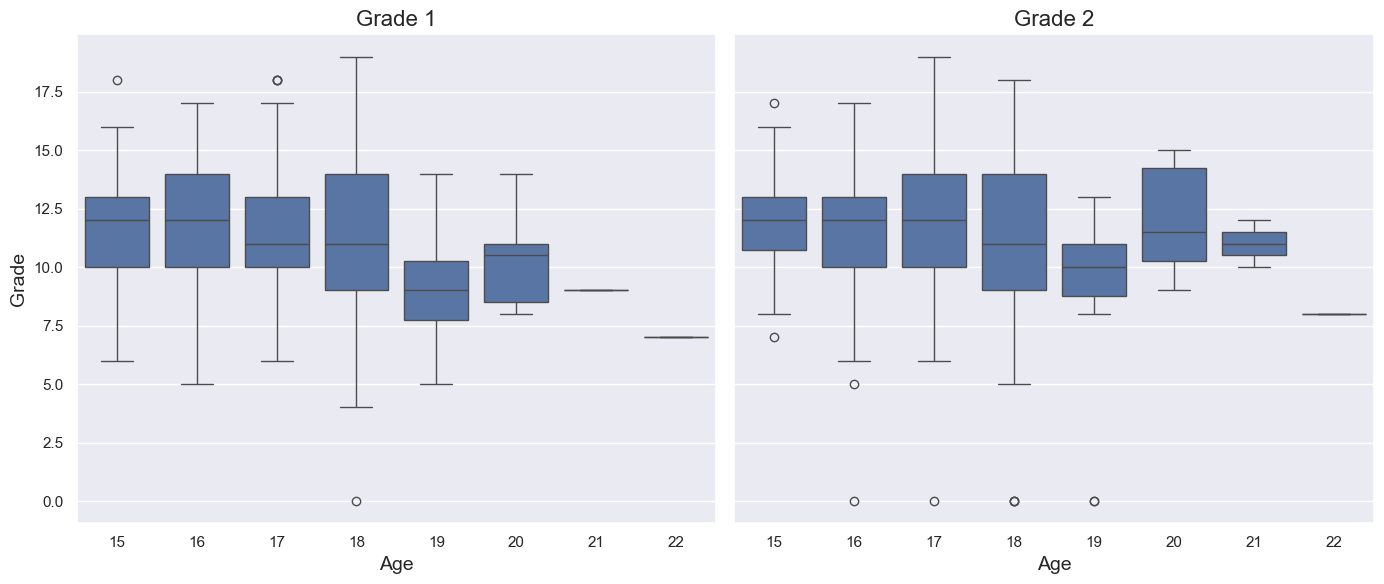

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
#plot = sns.boxplot(data=df, x='age', y='G1')
sns.boxplot(data=df, x='age', y='G1', ax=axes[0])
axes[0].set_title('Grade 1', fontsize=16)
axes[0].set_xlabel('Age', fontsize=14)
axes[0].set_ylabel('Grade', fontsize=14)

sns.boxplot(data=df, x='age', y='G2', ax=axes[1])
axes[1].set_title('Grade 2', fontsize=16)
axes[1].set_xlabel('Age', fontsize=14)
plt.tight_layout()
plt.show()

Very slight, negative trend in grades with increasing age.

**Some exploration in terms of Urban/Rural and the Education levels.** 

Education levels of parents can be used as indicators of socioeconomic status of population. Some insights on access to education can be gained from this.

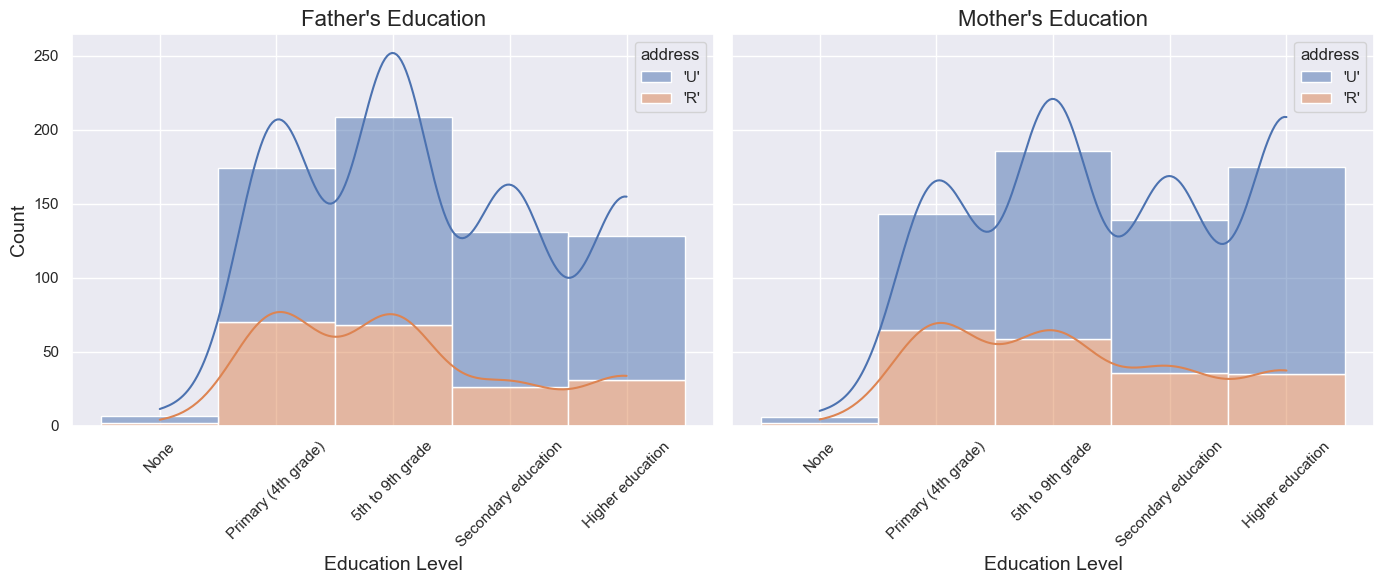

In [100]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
education_labels = ['None', 'Primary (4th grade)', '5th to 9th grade', 'Secondary education', 'Higher education']
# Father's education
sns.histplot(df, x='Fedu', hue='address', multiple='stack', kde=True, ax=axes[0], discrete=True)
axes[0].set_title('Father\'s Education', fontsize=16)
axes[0].set_xlabel('Education Level', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].set_xticks(range(5))
axes[0].set_xticklabels(education_labels, rotation=45)

#Mother's education
sns.histplot(df, x='Medu', hue='address', multiple='stack', kde=True, ax=axes[1], discrete=True)
axes[1].set_title('Mother\'s Education', fontsize=16)
axes[1].set_xlabel('Education Level', fontsize=14)
axes[1].set_xticks(range(5))
axes[1].set_xticklabels(education_labels, rotation=45)

plt.tight_layout()
plt.show()

- First interesting insight, there is some form of education among the parents. Almost **all of them have atleast primary education**.
- There is a **higher count of parents (both fathers and mothers) with 'higher education' in urban areas compared to rural areas**.
- A good number of parents have education levels from the 5th to the 9th grade.
- In **urban areas, there is a more evenly distributed range of education levels among parents**, whereas in rural setting, there seems to be a higher concentration of parents with education levels in the '5th to 9th grade' category, with fewer parents having higher education. But overall, urban population generally seems to have access to more education.
- There **does not appear to be a significant difference between the education levels of fathers and mothers**. Both histograms show similar distributions. 

A more principled approach to studying the features can be done through a correlation plot. Typically correlation plots shouldn't be used for categorical data, with independent labels. But in the above data-set, there are numeric features, with a numeric relation ship. For instance, age, Medu, Fedu, traveltime, studytime, failures, health, D/Walc etc. are numeric data with a range in increasing order. Though it can be automated to some degree, some eye-balling is required here.

In [502]:
# select only the numeric columns where correlation analysis makes sense. Also drop the labels G1 and G2
numeric_cols = df.select_dtypes(exclude=['object']).columns.drop(['G1', 'G2']) #['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

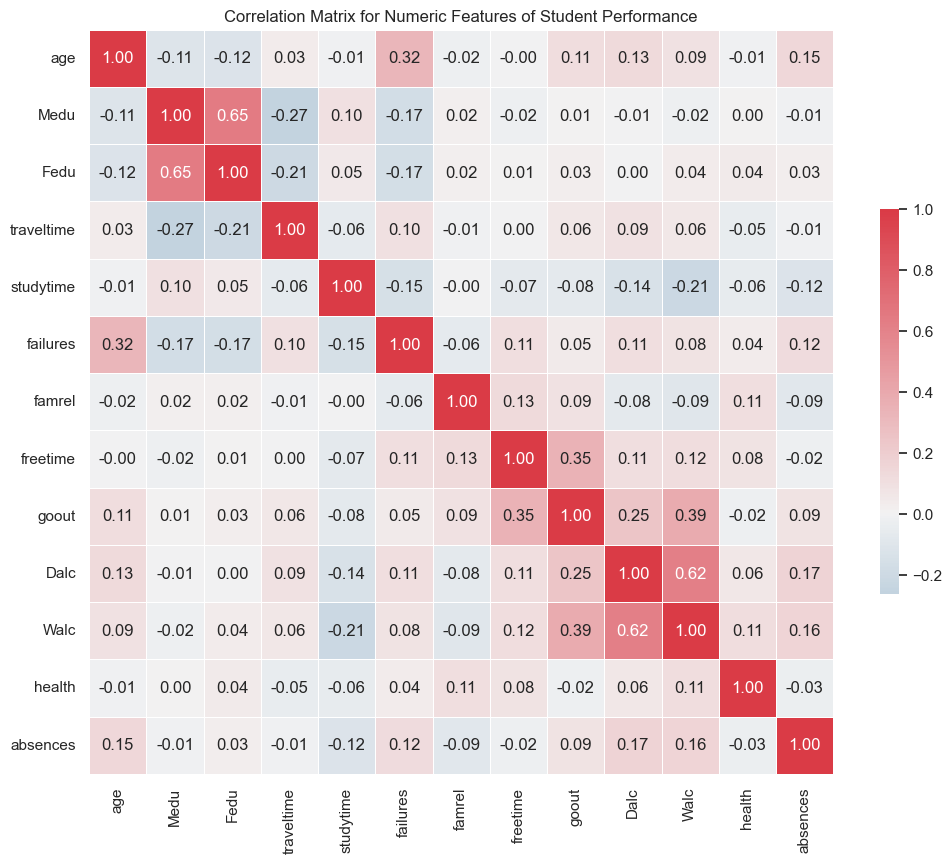

In [503]:
cmap = sns.diverging_palette(240, 10, as_cmap=True) #color palette that diverges from mid-point. good for correlation plots.
plt.figure(figsize=(12, 10))
sns.heatmap(df[numeric_cols].corr(), vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .50}, cmap=cmap)
plt.title("Correlation Matrix for Numeric Features of Student Performance")
plt.show()

In [504]:
# Ranking the top correlations, negative and positive 
numeric_df.corr().abs().unstack().sort_values(ascending = False).drop_duplicates()[1:10]

Medu        Fedu          0.647477
Walc        Dalc          0.616561
            goout         0.388680
freetime    goout         0.346352
failures    age           0.319968
traveltime  Medu          0.265079
goout       Dalc          0.245126
Walc        studytime     0.214925
Fedu        traveltime    0.208288
dtype: float64

Some insights from the correlation plot :
- There is a strong positive correlation (0.65) between mother's and father's education.
- Weekend alcohol consumption (Walc) has a strong positive correlation with workday alcohol consumption (Dalc) of 0.62. This can be interpreted that **students who consume more alcohol on weekdays tend to also consume more on weekends**. Additionally, goout (going out with friends) has a moderate positive correlation with both Walc (0.39) and Dalc (0.25). This somewhat suggests that **students who go out more frequently tend to consume more alcohol**.
- There is a decent positive correlation (0.35) between freetime (free time after school) and goout, which ican be expected as **more free time may lead to more opportunities to go out**.
-`studytime' has a negative correlation with Walc (-0.21). That could mean that **students who spend more time studying tend to consume less alcohol on weekends**.
- Mothers with higher education levels may live closer to schools, reducing travel time for students. This can be conveyed from negative correlation between Medu and traveltime (-0.27).
- There is a positive correlation (0.32) between age and failures. This can be interpreted that **older students tend to have experienced more class failures**.

---

---
# Modeling
## Closer look at the labels
So let's think about what possible questions can be answered based on the provided data. First and the most obvious question that comes to mind is **can we be be able to predict student's performace**. And as a follow up **what attributes contribute to student's performance**.

In order to answer the question, first we need a viable evaluation metric. In the dataset we are provided with each student's absences, first and second period grades (G1 and G2). First we'll take a closer look at the grades. The distributions of grades are as follows.

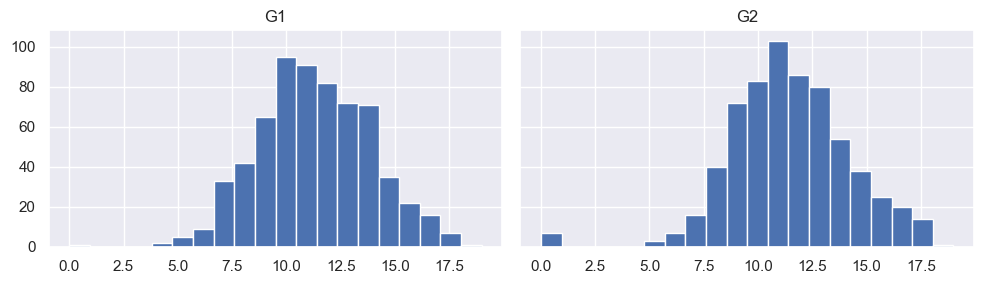

In [188]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True, figsize=(10,3))

axs[0].hist(df['G1'], bins=20)
axs[0].set_title('G1')
axs[1].hist(df['G2'], bins=20)
axs[1].set_title('G2')
_ = plt.show()

Data seems somewhat correlated, we'll confirm that with a correlation plot as well

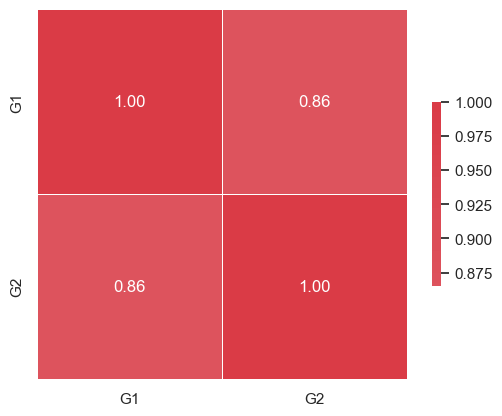

In [189]:
plot = sns.heatmap(df[['G1', 'G2']].corr(), vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .50}, cmap=cmap)

To simplify, I will be ommiting the G1, and **using only G2 as label**. 

In [200]:
X = encoded_df.drop(['G1', 'G2'], axis=1)
y = encoded_df['G2']

In the pursuit of a good evaluation method, 2 possibilities were considered.
<ol>
    <li> We look only at whether a student is passing(1) or failing(0) (Binary Labels). </li>
    <li> We categorise students across a spectrum based on certain criteria. Here the chosen criteria is based Portugal Ministry of Education recommendation. </li>
</ol> 

In [507]:
#snippet to generate labels depending on binay or multi-class classification

def make_labels(y, evaluation='multi_class'):
    if evaluation == 'binary':
        binary_y = (y >=12).astype(int)
        return binary_y
    
    elif evaluation == 'multi_class':
        mc_y = y.copy()
        mc_y[y <4] = 5
        mc_y[y.between(3,9)] = 4
        mc_y[y.between(9,13)] = 3
        mc_y[y.between(13,17)] = 2
        mc_y[y.between(17,20)] = 1
        return mc_y

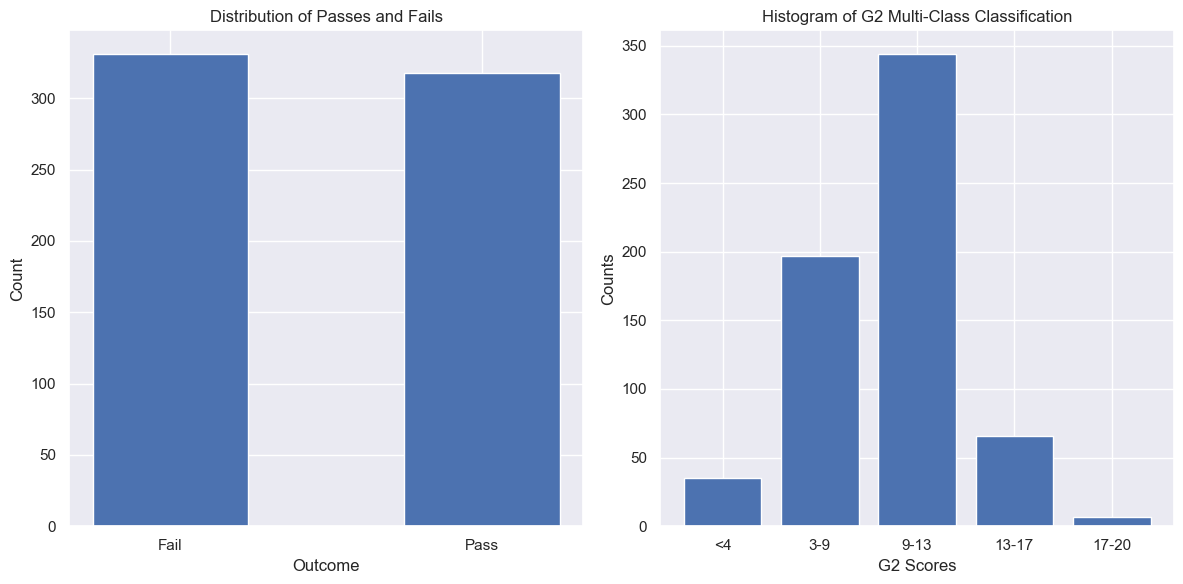

Number of Fails:	35
Number of Passes:	197


In [508]:
# we will take a look at distribution of data in each type of classes

binary_y = make_labels(y, evaluation='binary') #get labels for binary classification
multi_y = make_labels(y, evaluation='multi_class') #get labels for multi_class classification

#num of entries in each bin
binary_unique, binary_counts = np.unique(binary_y, return_counts=True)
multi_unique, multi_counts = np.unique(multi_y, return_counts=True)

plt.figure(figsize=(12, 6)) 
plt.subplot(1, 2, 1)
plt.hist(binary_y, bins=np.arange(3) - 0.5, align='mid', rwidth=0.5)
plt.xticks(ticks=binary_unique, labels=['Fail', 'Pass'])
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Distribution of Passes and Fails')

labels = ["<4", "3-9", "9-13", "13-17", "17-20"]
plt.subplot(1, 2, 2)
plt.bar(labels, multi_counts)
plt.xlabel('G2 Scores')
plt.ylabel('Counts')
plt.title('Histogram of G2 Multi-Class Classification')

plt.tight_layout()
plt.show()
print(f"Number of Fails:\t{counts[0]}\nNumber of Passes:\t{counts[1]}")

### Binary Classification

We will consider this case as a straightforward pass/fail evaluation. We assume that **minimum percentage to pass the class is 60%** which corresponds to getting atleast 12 in the overall grade.

In [509]:
# Snippet to vectorise the features using LabelEncoder, or One Hot Encoder. Just extended to make sure if we split the data into test and train, store the label encoding for consistent encoding. 
def categorical_encode(df, label_encoders=None):
    encoded_df = df.copy()
    categorical_vars = df.select_dtypes(include=['object']).columns # we are choosing only the non-numeric columns for categorical encoding
    if label_encoders is None: #if train or unsplit data
        label_encoders = {}
        for var in categorical_vars:
            le = OneHotEncoder()
            encoded_df[var] = le.fit_transform(df[var])
            label_encoders[var] = le
        return encoded_df, label_encoders
    else:
        for var in categorical_vars:
            le = label_encoders[var]
            encoded_df[var] = le.transform(df[var])
        return encoded_df

def categorical_onehot_encode(df, label_encoders=None):
    encoded_df = df.copy()
    categorical_vars = df.select_dtypes(include=['object']).columns # we are choosing only the non-numeric columns for categorical encoding
    if label_encoders is None: #if train or unsplit data
        label_encoders = {}
        for var in categorical_vars:
            le = OneHotEncoder()
            transformed = le.fit_transform(df[[var]]).toarray()
            cols = [f"{var}_{category}" for category in le.categories_[0]] #create new columns ofr the one hot vecs
            encoded_df = encoded_df.drop(var, axis=1) #remove the original label now that we have one hot
            encoded_df[cols] = transformed
            label_encoders[var] = le
        return encoded_df, label_encoders
    else:
        for var in categorical_vars:
            le = label_encoders[var]
            transformed = le.transform(df[[var]]).toarray()
            cols = [f"{var}_{category}" for category in le.categories_[0]]
            encoded_df = encoded_df.drop(var, axis=1)
            encoded_df[cols] = transformed
        return encoded_df

In [510]:
# we are doing one hot for categorical features
encoded_feats, encoded_feats_encoders = categorical_onehot_encode(X)
encoded_feats

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_'no',activities_'yes',nursery_'no',nursery_'yes',higher_'no',higher_'yes',internet_'no',internet_'yes',romantic_'no',romantic_'yes'
0,18,4,4,2,2,0,4,3,4,1,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,17,1,1,1,2,0,5,3,3,1,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,15,1,1,1,2,0,4,3,2,2,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,15,4,2,1,3,0,3,2,2,1,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,16,3,3,1,2,0,4,3,2,1,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
645,18,3,1,1,2,0,4,3,4,1,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
646,18,1,1,2,2,0,1,1,1,1,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
647,17,3,1,2,1,0,2,4,5,3,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [445]:
# splitting the data into train (80%) and test (20%) sets. We will use the existing train_test_split from the scikit-learn
X_train, X_test, y_train, y_test = train_test_split(encoded_feats, binary_y, test_size=0.2, random_state=42)


#pandas and numpy handles sizes differently. an absolute pain to write codes from scratch. maintaining consistency is key.
X_train = X_train.to_numpy().T
X_test = X_test.to_numpy().T

y_train = y_train.values.reshape(1, -1)
y_test = y_test.values.reshape(1, -1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(56, 519) (56, 130) (1, 519) (1, 130)


# Task 3 : Logistic Regression implementation

We will be writing the vanilla gradient descent, and the mini-batch variants. For our evaluation, we will calcualte accuracy and also slightly more stricter F1 score.  It is the weighted average of Precision and Recall. 

In [459]:
def sigmoid(z): # logistic function
    z = np.clip(z, -500, 500) #sigmoid is stablized
    return 1 / (1 + np.exp(-z))

# Clearly write your cost function and derivatives before implementing gradient descent.
def compute_cost_gradients(X, y, w, b): 
    if X.ndim == 1:  # single sample if in case if SGD is used
        m = 1
        X = X.reshape(-1, 1)
        y = np.array([y])
    else:  # or batch of examples
        m = X.shape[1]
    
    A = sigmoid(np.dot(w.T, X) + b)
    cost = (-1 / m) * np.sum(y * np.log(A) + (1 - y) * (np.log(1 - A)))
    dw = np.dot(X, (A - y).T) / m
    db = np.sum(A - y) / m
    return cost, dw, db

def predict(X, w, b):
    A = sigmoid(np.dot(w.T, X) + b)
    predictions = A > 0.5
    return predictions

def evaluate(X_train, X_test, y_train, y_test, w, b):
    y_pred_train = predict(X_train, w, b)
    y_pred_test = predict(X_test, w, b)

    #accuracy
    train_accuracy = np.mean(y_pred_train == y_train) # average of matches
    test_accuracy = np.mean(y_pred_test == y_test) # average of matches

    #for F1 score, precision, recall
    TP = np.sum((y_test == 1) & (y_pred_test == 1))
    FP = np.sum((y_test == 0) & (y_pred_test == 1))
    FN = np.sum((y_test == 1) & (y_pred_test == 0))

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    print(f"Training Accuracy\t:\t{train_accuracy * 100:.2f}%\nTest Accuracy\t\t:\t{test_accuracy * 100:.2f}%\n\nFinal cost\t\t:\t{costs[-1]}")
    print(f"F1 Score\t\t:\t{f1:.2f}")

---
### Vanilla Gradient Descent

In [449]:
def batch_gradient_descent(X, y, w, b, learning_rate, nb_epochs):
    costs = []
    with tqdm(total=nb_epochs, desc="Vanilla GRadient Descent Training Progress") as pbar: #fancy bar
        for i in range(nb_epochs):
            cost, dw, db = compute_cost_gradients(X, y, w, b)
            
            w = w - learning_rate * dw
            b = b - learning_rate * db
            
            costs.append(cost)
            
            if i % 5000 == 0 or i == nb_epochs - 1: #show cost every 5000 iterations
                pbar.set_postfix({'cost': cost})
            
            pbar.update(1)
    
    return w, b, costs

We will run this model with vanilla gradient descent and full batch. The final cost and accuracy is printed.

In [460]:
w = np.zeros((X_train.shape[0], 1))
b = 0
w, b, costs_gd = batch_gradient_descent(X_train, y_train, w, b, learning_rate=0.1, nb_epochs=100000)
evaluate(X_train, X_test, y_train, y_test, w, b)

Vanilla GRadient Descent Training Progress: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:09<00:00, 10892.15it/s, cost=1.2]

Training Accuracy	:	72.25%
Test Accuracy		:	66.15%

Final cost		:	0.32188416573433054
F1 Score		:	0.74


---
### Mini-batch gradient descent

In [451]:
#we create function to get randomly generated mini_batches

def get_batches(X, y, batch_size):
    n_samples = X.shape[1]
    mini_batches = []
    
    permutation = list(np.random.permutation(n_samples)) #random permutation of indices

    permute_X = X[:, permutation]
    permute_y = y[:, permutation]

    num_batches = n_samples // batch_size #no. of mini batches

    for i in range(0, num_batches): #generate batches
        mini_batch_X = permute_X[:, i * batch_size:(i + 1) * batch_size]
        mini_batch_y = permute_y[:, i * batch_size:(i + 1) * batch_size]
        mini_batches.append((mini_batch_X, mini_batch_y))
    
    if n_samples % batch_size != 0: #last mini-batch with lesser size. this is standard procedure
        mini_batch_X = permute_X[:, num_batches * batch_size:]
        mini_batch_y = permute_y[:, num_batches * batch_size:]
        mini_batches.append((mini_batch_X, mini_batch_y))
    
    return mini_batches

def mini_batch_gradient_descent(X, y, w, b, learning_rate, nb_epochs, batch_size):
    costs = []

    with tqdm(total=nb_epochs, desc="Mini-batch Training Progress") as pbar: #fancy bar
        for i in range(nb_epochs):
            mini_batches = get_batches(X, y, batch_size)
            
            for mini_batch in mini_batches:
                (mini_batch_X, mini_batch_y) = mini_batch #we do it for single batch instead of entire data
                cost, dw, db = compute_cost_gradients(mini_batch_X, mini_batch_y, w, b)
                
                w = w - learning_rate * dw
                b = b - learning_rate * db
            
            costs.append(cost)
            
            if i % 5000 == 0 or i == nb_epochs - 1: #show cost every 5000 iterations
                pbar.set_postfix({'cost': cost})
            
            pbar.update(1)
    
    return w, b, costs

In [461]:
batch_size = 50

w = np.zeros((X_train.shape[0], 1))
b = 0
w, b, costs_batchgd = mini_batch_gradient_descent(X_train, y_train, w, b, learning_rate=0.1, nb_epochs=100000, batch_size=batch_size)
evaluate(X_train, X_test, y_train, y_test, w, b)

Mini-batch Training Progress: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:23<00:00, 4251.10it/s, cost=0.348]

Training Accuracy	:	78.61%
Test Accuracy		:	61.54%

Final cost		:	0.32188416573433054
F1 Score		:	0.65


Mini-batch seems to have better accuracy in this case. However, F1 seems to be a tad bit low. 

---
# Task 4

We will now find an improved optimization algorithm. For that, we will write Adam and Adagrad. We will implement this for mini-batch method

### Adam

In [454]:
def adam_mini_batch_optimization(X, y, w, b, learning_rate, nb_epochs, batch_size, beta1=0.9, beta2=0.999, epsilon=1e-8): #hyper-parameters obtained from authors proposal in the paper. no tuning is done. 
    costs = []
    m_w, v_w = np.zeros(w.shape), np.zeros(w.shape) #momentums
    m_b, v_b = 0, 0

    with tqdm(total=nb_epochs, desc="Adam Mini-batch Training Progress") as pbar: #fancy bar
        for i in range(nb_epochs):
            mini_batches = get_batches(X, y, batch_size)
            
            for mini_batch in mini_batches:
                (mini_batch_X, mini_batch_y) = mini_batch
                cost, dw, db = compute_cost_gradients(mini_batch_X, mini_batch_y, w, b)

                m_w = beta1 * m_w + (1 - beta1) * dw
                m_b = beta1 * m_b + (1 - beta1) * db
                v_w = beta2 * v_w + (1 - beta2) * (dw ** 2)
                v_b = beta2 * v_b + (1 - beta2) * (db ** 2)

                # from paper : They counteract these biases by computing bias-corrected first and second moment estimates
                m_w_corrected = m_w / (1 - beta1 ** (i + 1))
                m_b_corrected = m_b / (1 - beta1 ** (i + 1))
                v_w_corrected = v_w / (1 - beta2 ** (i + 1))
                v_b_corrected = v_b / (1 - beta2 ** (i + 1))

                w = w - learning_rate * m_w_corrected / (np.sqrt(v_w_corrected) + epsilon)
                b = b - learning_rate * m_b_corrected / (np.sqrt(v_b_corrected) + epsilon)

            costs.append(cost)
            
            if i % 1000 == 0 or i == nb_epochs - 1: #show cost every 1000 iterations
                pbar.set_postfix({'cost': cost})
            
            pbar.update(1)
    
    return w, b, costs

In [464]:
w = np.zeros((X_train.shape[0], 1))
b = 0
w, b, costs = adam_mini_batch_optimization(X_train, y_train, w, b, learning_rate=0.1, nb_epochs=100000, batch_size=10, beta1=0.9, beta2=0.999, epsilon=1e-8)
evaluate(X_train, X_test, y_train, y_test, w, b)

Adam Mini-batch Training Progress: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [01:55<00:00, 867.59it/s, cost=1.42]


Training Accuracy	:	74.76%
Test Accuracy		:	62.31%

Final cost		:	1.41603167890074
F1 Score		:	0.60


Seems to have slightly better performance compared to regular optimization. Also has a decent F1 score.

In [456]:
def adagrad_mini_batch_optimization(X, y, w, b, learning_rate, nb_epochs, batch_size, epsilon=1e-8):
    costs = []
    g_w, g_b = np.zeros(w.shape), 0

    with tqdm(total=nb_epochs, desc="AdaGrad Mini-batch Training Progress") as pbar: #fancy bar
        for i in range(nb_epochs):
            mini_batches = get_batches(X, y, batch_size)
            
            for mini_batch in mini_batches:
                (mini_batch_X, mini_batch_y) = mini_batch
                cost, dw, db = compute_cost_gradients(mini_batch_X, mini_batch_y, w, b)

                #from paper : g is a diagonal matrix where each diagonal element i, i is the sum of the squares of the gradient wrt time
                g_w += dw ** 2
                g_b += db ** 2
    
                w = w - learning_rate * dw / (np.sqrt(g_w) + epsilon)
                b = b - learning_rate * db / (np.sqrt(g_b) + epsilon)
    
            costs.append(cost)
            
            if i % 1000 == 0 or i == nb_epochs - 1: #show cost every 1000 iterations
                pbar.set_postfix({'cost': cost})
            
            pbar.update(1)
        
    return w, b, costs

In [463]:
w = np.zeros((X_train.shape[0], 1))
b = 0
w, b, costs = adagrad_mini_batch_optimization(X_train, y_train, w, b, learning_rate=0.1, nb_epochs=100000, batch_size=batch_size, epsilon=1e-8)
evaluate(X_train, X_test, y_train, y_test, w, b)

AdaGrad Mini-batch Training Progress: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:26<00:00, 3829.59it/s, cost=0.62]

Training Accuracy	:	78.61%
Test Accuracy		:	61.54%

Final cost		:	0.6204302776437859
F1 Score		:	0.67


To summarise the algorithms for the classification task using logistic regression,  we have

| Algorithm          | Training Accuracy | Test Accuracy | Test F1 Score |
|--------------------|-------------------|---------------|---------------|
| Vanilla GD         | 72.25%            | 66.15%        | 0.74          |
| Mini-Batch GD      | 78.61%            | 61.54%        | 0.65          |
| Adam Mini Batch (Batch Size 50)   | 81.12%            | 61.54%        | 0.67          |
| Adam Mini Batch (Batch Size 10)   | 74.76%            | 62.31%        | 0.67          |
| AdaGrad Mini Batch | 78.61%            | 61.54%        | 0.67          |

Adam Mini Batch shows the highest training accuracy, implying best fit for the training data. However, Vanilla GD seems to have better generalization. This is interesting, since a more complex method has not outperformed the vanilla model. THis likely is for this specific data-set,, since Adam typically provides improved results. They accelerate the learning process. But looks like it might have created an overfit as well.

Vanilla GD also has provided the highest F1 score. For a problem like classification, F1 score is more appropriate, especially with class imbalance in other problems.

A trade-off between speed and performance can be established with batch_size. For instance Adam with batch_size 10 took much longer than 50. 

---
Just to see how much the algorithm written from scratch compares to the packaged implementations, we will use the sklearn's implementation.

In [481]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

lr = LogisticRegression(max_iter=10000)
lr.fit(X_train.T, y_train.T.ravel())

y_pred_train = lr.predict(X_train.T)
y_pred_test = lr.predict(X_test.T)
lr_acc_tr = accuracy_score(y_train.T.ravel(), y_pred_train)
lr_acc_te = accuracy_score(y_test.T.ravel(), y_pred_test)
lr_f1_te = f1_score(y_test.T.ravel(), y_pred_test)

print(f"Training Accuracy\t:\t{100*lr_acc_tr:.2f}%\nTest Accuracy\t\t:\t{lr_acc_te:.2f}\nF1 Score\t\t:\t{lr_f1_te:.2f}")

Training Accuracy	:	79.00%
Test Accuracy		:	0.62
F1 Score		:	0.67


Seems comparable with standard implementation